In [47]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
     )

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch)
    print(label_batch.numpy())

(32, 256, 256, 3)
tf.Tensor([0 0 1 1 0 1 1 1 1 0 0 1 2 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0], shape=(32,), dtype=int32)
[0 0 1 1 0 1 1 1 1 0 0 1 2 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0]


In [7]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[188. 183. 189.]
  [198. 193. 199.]
  [199. 194. 200.]
  ...
  [192. 189. 196.]
  [192. 189. 196.]
  [186. 183. 190.]]

 [[190. 185. 191.]
  [201. 196. 202.]
  [202. 197. 203.]
  ...
  [189. 186. 193.]
  [188. 185. 192.]
  [185. 182. 189.]]

 [[186. 181. 187.]
  [196. 191. 197.]
  [196. 191. 197.]
  ...
  [186. 183. 190.]
  [184. 181. 188.]
  [186. 183. 190.]]

 ...

 [[152. 145. 152.]
  [152. 145. 152.]
  [157. 150. 157.]
  ...
  [133. 128. 135.]
  [141. 136. 143.]
  [150. 145. 152.]]

 [[148. 141. 148.]
  [148. 141. 148.]
  [154. 147. 154.]
  ...
  [134. 129. 136.]
  [141. 136. 143.]
  [151. 146. 153.]]

 [[153. 146. 153.]
  [153. 146. 153.]
  [158. 151. 158.]
  ...
  [136. 131. 138.]
  [140. 135. 142.]
  [146. 141. 148.]]]


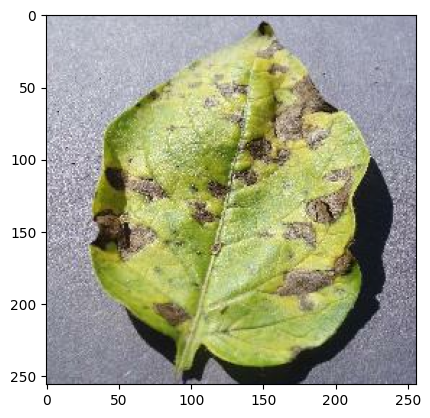

In [8]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))

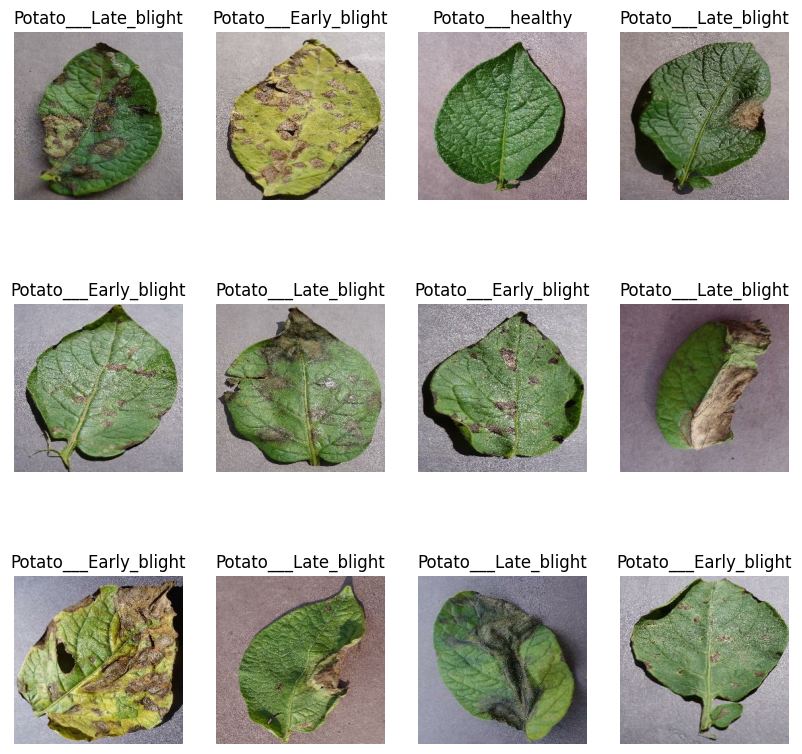

In [9]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
        plt.imshow(image_batch[i].numpy().astype("uint8"))

In [10]:
len(dataset)

68

In [11]:
train_size = 0.8
len(dataset)* train_size

54.400000000000006

In [12]:
train_ds = dataset.take(54)
len(train_ds)

54

In [13]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [14]:
val_size = 0.1
len(dataset) * val_size

6.800000000000001

In [15]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [16]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [17]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=1000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [18]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [19]:
len(train_ds)

54

In [20]:
len(val_ds)

6

In [21]:
len(test_ds)

8

In [22]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [23]:
resize_and_scale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [24]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)    
])

In [25]:
input_shape = (BATCH_SIZE, IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_scale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape= input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu', input_shape= input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu', input_shape= input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu', input_shape= input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu', input_shape= input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu', input_shape= input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
    
])

model.build(input_shape=input_shape)

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [27]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [28]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 57s 947ms/step - loss: 0.8379 - accuracy: 0.5723 - val_loss: 0.6715 - val_accuracy: 0.7604
Epoch 2/50
54/54 [==============================] - 49s 912ms/step - loss: 0.5823 - accuracy: 0.7425 - val_loss: 0.4257 - val_accuracy: 0.8281
Epoch 3/50
54/54 [==============================] - 46s 851ms/step - loss: 0.3321 - accuracy: 0.8692 - val_loss: 0.2749 - val_accuracy: 0.8802
Epoch 4/50
54/54 [==============================] - 47s 868ms/step - loss: 0.2757 - accuracy: 0.8877 - val_loss: 0.2521 - val_accuracy: 0.9115
Epoch 5/50
54/54 [==============================] - 46s 853ms/step - loss: 0.2255 - accuracy: 0.9103 - val_loss: 0.2098 - val_accuracy: 0.9167
Epoch 6/50
54/54 [==============================] - 46s 848ms/step - loss: 0.2223 - accuracy: 0.9097 - val_loss: 0.3210 - val_accuracy: 0.8854
Epoch 7/50
54/54 [==============================] - 47s 874ms/step - loss: 0.2093 - accuracy: 0.9172 - val_loss: 0.2569 - val_accuracy: 0.9010

In [29]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 5s 164ms/step - loss: 0.0689 - accuracy: 0.9844


In [30]:
scores

[0.0688827857375145, 0.984375]

In [31]:
history

In [32]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [34]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [35]:
len(history.history['accuracy'])

50

In [36]:
history.history['accuracy']

[0.5723379850387573,
 0.7424768805503845,
 0.8692129850387573,
 0.8877314925193787,
 0.9103009104728699,
 0.9097222089767456,
 0.9172453880310059,
 0.9201388955116272,
 0.9276620149612427,
 0.9403935074806213,
 0.9427083134651184,
 0.9502314925193787,
 0.9479166865348816,
 0.9450231194496155,
 0.9519675970077515,
 0.953125,
 0.9525462985038757,
 0.9652777910232544,
 0.9675925970077515,
 0.9658564925193787,
 0.953125,
 0.9658564925193787,
 0.9542824029922485,
 0.9542824029922485,
 0.9658564925193787,
 0.9629629850387573,
 0.9675925970077515,
 0.9612268805503845,
 0.9646990895271301,
 0.9710648059844971,
 0.9693287014961243,
 0.9664351940155029,
 0.9785879850387573,
 0.9733796119689941,
 0.9814814925193787,
 0.9803240895271301,
 0.9832175970077515,
 0.9612268805503845,
 0.9733796119689941,
 0.9774305820465088,
 0.9855324029922485,
 0.9768518805503845,
 0.96875,
 0.9780092835426331,
 0.9809027910232544,
 0.9878472089767456,
 0.9837962985038757,
 0.9901620149612427,
 0.984375,
 0.984375]

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

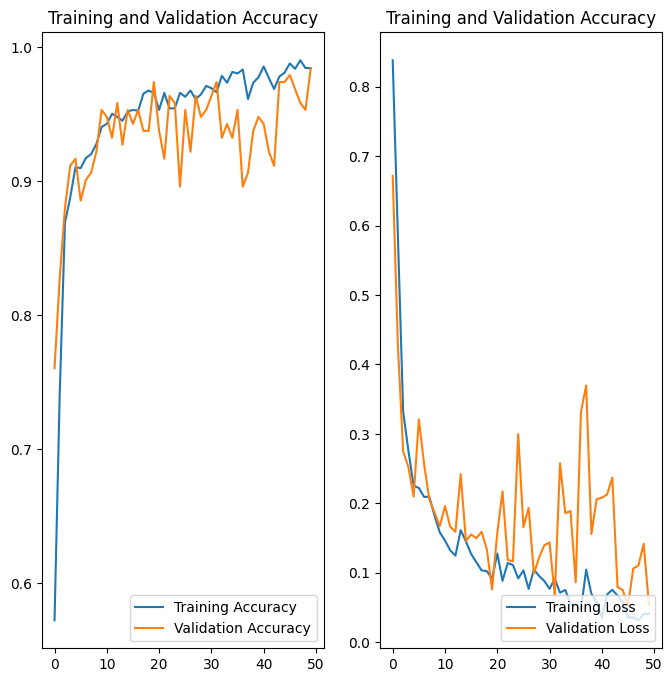

In [40]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc="lower right")
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc="lower right")
plt.title('Training and Validation Accuracy')

First image to predict
actual label : Potato___Early_blight
1/1 [==============================] - 0s 181ms/step
predicted label : Potato___Early_blight


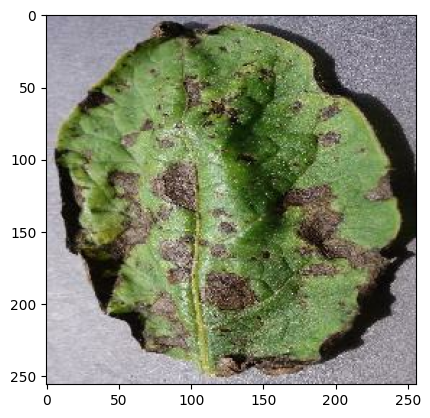

In [51]:
for image_batch, label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype("uint8")
    first_label = label_batch[0].numpy()
    
    print('First image to predict')
    plt.imshow(first_image)
    
    print("actual label :", class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label :",class_names[np.argmax(batch_prediction[0])])

In [53]:
model_version = 1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets
